## Num of shares calculator based on market cap 

##### Larger market cap = more weight in portfolio

### Import Libraries

In [202]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

### Get Market Cap for select stocks

In [203]:
# Function to extract market cap for the selected tickers
def get_market_cap(df, tickers):
    market_caps = {}
    magnitudes = {
        'T': 1,
        'B': 1000,
        'M': 1000*1000
    }
    for ticker in tickers:
        info = df[df['Symbol'].str.contains(ticker)]
        if not info.empty:
            info = info.iloc[0]['Market cap'].split('\u202f') # splitting by narrow no-break space
            magnitude = magnitudes[info[1][0]] 
            market_caps[ticker] = float(info[0]) / magnitude 
        else:
            market_caps[ticker] = 0 # If ticker is not found in the data frame
    return market_caps

In [204]:
# List of tickers (can be whatever order you want)
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "LLY", "AVGO"]

# Data for market cap
df = pd.read_html('https://www.tradingview.com/symbols/SPX/components/')[0] # Returns a list of tables, the first is the one we want
MARKET_CAP = get_market_cap(df, tickers)
INVESTMENT_AMOUNT = 20000  # USD
df.head(10)

,Symbol,Market cap,Price,Change %,Volume,Rel Volume,P/E,EPS dilTTM,EPS dil growthTTM YoY,Div yield %TTM,Sector,Analyst Rating
0,AAPLApple Inc.,3.347 T USD,220.17 USD,−1.17%,26.324 M,0.65,33.52,6.57 USD,+10.38%,0.44%,Electronic technology,Buy
1,MSFTMicrosoft Corporation,3.035 T USD,408.37 USD,−0.26%,8.181 M,0.47,34.60,11.80 USD,+21.86%,0.73%,Technology services,Strong buy
2,NVDANVIDIA Corporation,2.675 T USD,109.04 USD,+0.96%,251.756 M,0.70,51.19,2.13 USD,+414.47%,0.02%,Electronic technology,Strong buy
3,GOOGAlphabet Inc.,1.941 T USD,158.38 USD,−0.15%,9.293 M,0.57,22.72,6.97 USD,+47.48%,0.13%,Technology services,Buy
4,GOOGLAlphabet Inc.,1.938 T USD,156.89 USD,−0.30%,10.367 M,0.52,22.50,6.97 USD,+47.48%,0.13%,Technology services,Buy
5,"AMZNAmazon.com, Inc.",1.82 T USD,173.44 USD,−1.59%,15.236 M,0.49,41.55,4.17 USD,+231.92%,0.00%,Retail trade,Strong buy
6,"METAMeta Platforms, Inc.",1.303 T USD,515.09 USD,+0.65%,4.915 M,0.48,26.30,19.59 USD,+128.32%,0.20%,Technology services,Strong buy
7,BRK.BBerkshire Hathaway Inc. New,1.023 T USD,474.69 USD,−0.45%,2.855 M,0.65,15.10,31.44 USD,−21.04%,0.00%,Finance,Buy
8,LLYEli Lilly and Company,900.623 B USD,947.60 USD,−0.93%,920.883 K,0.35,118.37,8.01 USD,+12.95%,0.53%,Health technology,Buy
9,AVGOBroadcom Inc.,721.879 B USD,155.08 USD,+1.50%,11.746 M,0.53,66.72,2.32 USD,−26.54%,1.33%,Electronic technology,Buy


In [205]:
# Double-check that Market Cap is correct
MARKET_CAP

{'AAPL': 3.347,
 'MSFT': 3.035,
 'GOOGL': 1.938,
 'AMZN': 1.82,
 'NVDA': 2.675,
 'META': 1.303,
 'TSLA': 0.7056319999999999,
 'LLY': 0.9006230000000001,
 'AVGO': 0.721879}

### Get current Price data

In [206]:
# Fetch data for last week to ensure at least one value
today = datetime.now()
last_week = (today - timedelta(days=7)).strftime("%Y-%m-%d")

# Fetching data for the tickers, taking most recent price 
current_price = yf.download(tickers, start=last_week)[-1:]['Close']

[*********************100%%**********************]  9 of 9 completed


In [207]:
current_price # check so there are no NaN values

Ticker,AAPL,AMZN,AVGO,GOOGL,LLY,META,MSFT,NVDA,TSLA
Date,,,,,,,,,
2024-09-04,220.75,173.159195,155.149994,156.419998,947.679993,515.0,409.049988,109.140099,220.505005


### Calculating weights for the stocks 

##### Calculation will be based on a stocks individual market cap vs total shared market cap

In [208]:
# Weights = individual market cap / total market cap
tot_cap = sum(MARKET_CAP.values()) 
weights = {}
for ticker in tickers:
    weights[ticker] = MARKET_CAP[ticker] / tot_cap
weights # show weights

{'AAPL': 0.20351287421104558,
 'MSFT': 0.18454185038258838,
 'GOOGL': 0.11783924416522447,
 'AMZN': 0.11066430566600029,
 'NVDA': 0.16265220750359932,
 'META': 0.07922834630922987,
 'TSLA': 0.042905645788852254,
 'LLY': 0.05476198844056603,
 'AVGO': 0.04389353753289375}

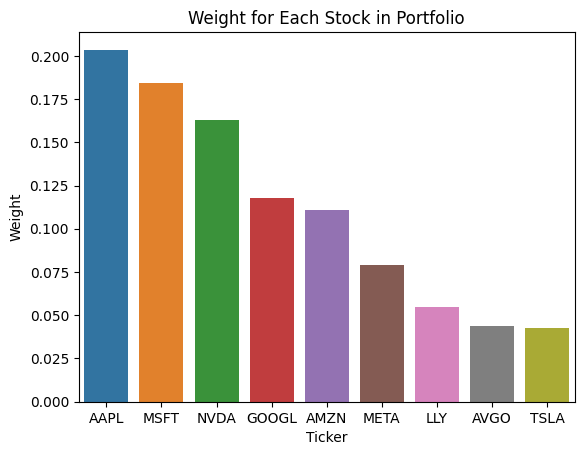

In [209]:
# Display the portfolio weights in descending order
weights_df = pd.DataFrame(data=[weights]).sort_values(by=0, axis=1, ascending=False) # by first row, sort along columns, descending order
sns.barplot(data=weights_df)
plt.title('Weight for Each Stock in Portfolio')
plt.ylabel('Weight')
plt.xlabel('Ticker')
plt.show()

### Individual investments 

##### Calculation based on weights and investment amount

In [210]:
# Weighted investment amounts = weights * investment amount
weighted_invest_amount = {}
for ticker in tickers:
    weighted_invest_amount[ticker] = weights[ticker] * INVESTMENT_AMOUNT
weighted_invest_amount # Show $USD to invest in each stock

{'AAPL': 4070.2574842209115,
 'MSFT': 3690.8370076517676,
 'GOOGL': 2356.7848833044895,
 'AMZN': 2213.286113320006,
 'NVDA': 3253.044150071986,
 'META': 1584.5669261845974,
 'TSLA': 858.112915777045,
 'LLY': 1095.2397688113206,
 'AVGO': 877.8707506578751}

In [211]:
# Number of shares to buy for each stock & total price
nshares = {}
for ticker in tickers:
    nshares[ticker] = int((weighted_invest_amount[ticker] / current_price[ticker].iloc[0]) // 1)
    # We are only interested in buying whole numbers of shares, and not go over the budget
    # Therefore, we round down to nearest integer by doing floor division by 1
pd.DataFrame([nshares], index=['Amount:']) # see how many shares of each ticker you should have!

,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,LLY,AVGO
Amount:,18,9,15,12,29,3,3,1,5
